In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
# %matplotlib qt
%matplotlib inline

In [59]:
# all function
def load_dataset():
    cols_cat = {'Name': 'category', 'Platform': 'category', 'Genre': 'category', 'Publisher': 'category'}
    df = pd.read_csv('vgsales.csv', dtype=cols_cat)
    cols = df.columns
    cols_cat_info = {i:df[i].cat.categories for i in cols_cat.keys()}
    
    # clean data 
    df['Year'] = df['Year'].fillna(1960).astype('int') #Mark NaN with 1960
    df['Publisher'] = df['Publisher'].fillna('Unknown') # fill unknown(?) values with Unknown

    unique = ['Rank', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Name']
    return {'data': df, 'cols_category': cols_cat.keys(), 'cols_category_info': cols_cat_info, 'unique_col': unique}

def getDataInfo_column(column):
    print(f'Select column: {column}')
    values = df[column].value_counts()
    indexs = list(df[column].value_counts().index)
    dl = {}
    for i in indexs:
        dl[i] = values[i]
    return dl

def notColumns(df, col_index):
    not_col = col_index not in range(len(df.columns)) 
    if not_col:
        print(f'{col_index} not index columns in data')
    return not_col

def addData(maxRank):
    import pandas as pd
    name = input('Enter name:')
    platform = input('Enter platform:')
    year = int(input('Enter year:'))
    genre = input('Enter genre:') 
    publisher = input('Enter publisher:')
    na_sales = float(input('Enter NA sales:'))
    eu_sales = float(input('Enter EU sales:'))
    jp_sales = float(input('Enter JP sales:'))
    other_sales = float(input('Enter  Other sales:'))
    global_sales = na_sales + eu_sales + jp_sales + other_sales
    
    # data model
    data = pd.DataFrame({
        'Rank': [maxRank+10], #mark not update
        'Name': [name],
        'Platform': [platform],
        'Year': [year],
        'Genre': [genre],
        'Publisher': [publisher],
        'NA_Sales': [na_sales],
        'EU_Sales': [eu_sales],
        'JP_Sales': [jp_sales],
        'Other_Sales': [other_sales],
        'Global_Sales': [global_sales]
    })
    return data

def UpdateRank(update, df, replace_rank=True):
    df = pd.concat([df, update], ignore_index=True)
    df = df.sort_values(['Global_Sales'], ascending=False, ignore_index=True)
    if replace_rank:
        df['Rank'] = df.index + 1
    else:
        df['newRank'] = df.index + 1
    return df

def search_column(df, key):
    col = list(map(lambda x: x.upper(), list(df.columns).copy()))
    return col.index(key.upper())
    
def plot_hist(df, column):
    plt.figure(figsize=(15, 8), clear=True)
    plt.title(f'Frequency of {column}')
    plt.xlabel(column)
    plt.hist(df[column], len(df[column].unique()), edgecolor = (0,0,0))
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
        
def isExit(command):
    command = command.upper()
    listExit = ['EXIT', 'E', 'Q']
    return (command in list(map(lambda x: x.upper(), listExit)))

def printInfoDataframe(df, **kwargs):
    print(df.info())
    
def plot_Data(df, **kwargs):
    columns_plot = list(filter(lambda x: x not in kwargs['unique'], df.columns))
    for i, v in enumerate(columns_plot):
        print(f'{i} : {v}')
    col = int(input('Select columns: '))
    if col not in range(len(columns_plot)):
        return
    else:
        col = list(df.columns).index(columns_plot[col])
    if notColumns(df, col):
        return
    plot_hist(df, df.columns[col])
    
    column_info = getDataInfo_column(df.columns[col])
    fcol = np.array([len(str(i))+1 for i in column_info.keys()]).max()
    fval = np.array([len(str(i))+1 for i in column_info.values()]).max()
    endline = 3
    counter = 0
    for k, v in column_info.items():
        counter += 1
        print(f'%{fcol}s : %{fval}s'%(k, str(v)), end=','+' '*5)
        if counter > endline:
            print()
            counter = 0
    
def add_Data(df, **kwargs):
    data = addData(df['Rank'].max())
    df = UpdateRank(data, df)
    return df

def save_Data(df, **kwargs):
    ow = input('Will you overwrite the original file? (Y/n): ').upper()
    if ow in ['Y', 'YES']:
        filename = 'vgsales'
    else:
        filename = input('Enter name of file: ')
    df.to_csv(f'{filename}.csv', index=False)
    
def search_Data(df, **kwargs):
    cols = df.columns.to_numpy()
    for i, v in enumerate(cols):
        print(f'{i} : {v}')
    col_index = int(input('Select column for search: '))
    if notColumns(df, col_index):
        return
    result = None
    if cols[col_index] in kwargs['cat']:
        s = input('Enter search: ')
        result = df[df[cols[col_index]].map(lambda x: x.upper()).map(lambda x: s.upper() in x)] # boolean index
    else:
        feature = int(input('Enter 0(<=) or 1(>=): '))
        s = input('Enter search: ')
        if feature:
            result = df[df[cols[col_index]] >= float(s)]
        else:
            result = df[df[cols[col_index]] <= float(s)]
    print('search result: ')
    if not len(result):
        return
    limit = 5
    counter = 0
    max_format = np.array([len(str(result.to_numpy()[:,i].max()))+1 for i in range(len(df.columns))])
    for i, v  in enumerate(result.to_numpy()):
        if counter == limit:
            break
        for j, c in enumerate(df.columns):
            print(f'{c}: %{max_format[j]}s'%format(str(v[j])), end=', ')
        print()
        counter += 1
    return

def showOption():
    print(f'''
    Menu Option
    1 : show info of Data,
    2 : plot Data(histogram),
    3 : add Data,
    4 : search Data,
    5 : save Data
    e, exit, q : end program !!!
    ''')


    Menu Option
    1 : show info of Data,
    2 : plot Data(histogram),
    3 : add Data,
    4 : search Data,
    5 : save Data
    e, exit, q : end program !!!
    
Enter option: 2
Select option: 2
0 : Platform
1 : Year
2 : Genre
3 : Publisher
Select columns: 2


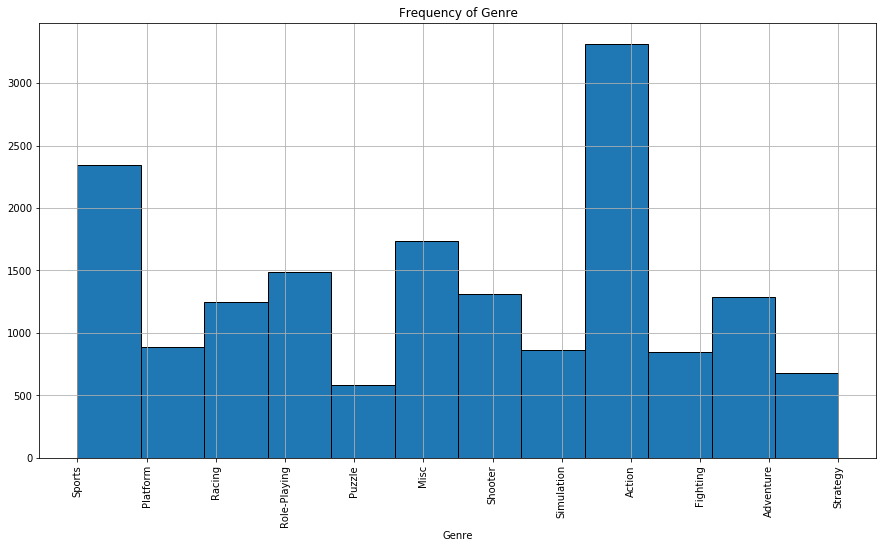

Select column: Genre
       Action :  3316,            Sports :  2346,              Misc :  1739,      Role-Playing :  1488,     
      Shooter :  1310,         Adventure :  1286,            Racing :  1249,          Platform :   886,     
   Simulation :   867,          Fighting :   848,          Strategy :   681,            Puzzle :   582,     

    Menu Option
    1 : show info of Data,
    2 : plot Data(histogram),
    3 : add Data,
    4 : search Data,
    5 : save Data
    e, exit, q : end program !!!
    


In [ ]:
if __name__ == '__main__':
    data = load_dataset()
    df = data['data']
    optionData = [printInfoDataframe, plot_Data, add_Data, search_Data, save_Data]
    option = {str(i): v for i, v in enumerate(optionData, 1)}
    while True:
        showOption()
        command = input('Enter option: ')
        if isExit(command):
            print('Thank')
            break
        if not command in option.keys():
            print('not found option')
            continue
        else:
            print(f'Select option: '+ command)
            if command in ['3']: # command update df
                df = option[command](df)
            else:
                option[command](df, cat=data['cols_category'], unique=data['unique_col'])
    cv2.destroyAllWindows()

In [ ]:
str(option['1'])

# ล่างนี้ลงไปไม่เกี่ยวนะครับ

In [ ]:
size = 0
for i in range(5):
    size = size+len(df[df['Year'] == 1985+i])
print(size)

In [15]:
data = load_dataset()
df = data['data']
df
df['Year'].value_counts().index

Int64Index([2009, 2008, 2010, 2007, 2011, 2006, 2005, 2002, 2003, 2004, 2012,
            2015, 2014, 2013, 2001, 1998, 2000, 2016, 1999, 1997, 1960, 1996,
            1995, 1994, 1993, 1981, 1992, 1991, 1982, 1986, 1989, 1983, 1990,
            1987, 1988, 1985, 1984, 1980, 2017, 2020],
           dtype='int64')

In [ ]:
'Name' in data['cols_category'].keys()

In [ ]:
a = addData(16600)
UpdateRank(a, df)

In [ ]:
df[df['Genre'].map(lambda x: x.upper()).map(lambda x: 'PL' in x)]

In [ ]:
# for i in df.head():
#     print(i)
[len(f'{df.to_numpy()[:,i].max()}')+1 for i in range(len(df.columns))]

In [ ]:
len(str(df.head().to_numpy()[:,1].max())) +1 

In [ ]:
s = 0
[1 if i in str(df.dtypes) else 0 for i in ['float', 'int']]

In [ ]:
dl = getDataInfo_column('Year')
np.array(sorted(dl.items()))

In [ ]:
%matplotlib inline
def plot_line(x, y, column, title):
    plt.figure(figsize=(10, 5), clear=True)
    plt.title(title)
    plt.xlabel(column[0])
    plt.ylabel(column[1])
    plt.plot(x, y, edgecolor = (0,0,0))
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()

genre = {}
for i in df['Genre'].unique():
    genre[i] = {}
    df_genre = df[df['Genre'] == i]
    for j in sorted(df['Year'].unique()):
        genre[i][j] = len(df_genre[df_genre['Year'] == j])

for i in genre.keys():
    data = np.array([[k, v] for k,v in genre[i].items()])
    x = data[:,0]
    y = data[:,1]
    column = ['Year', 'Count']
    title = i
    print(title)
#     plt.title(title)
    plt.figure(figsize=(10, 5), clear=True)
    plt.plot(x, y, label = i)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.xlabel(column[0])
    plt.ylabel(column[1])
    plt.show()
#     plt.show()

In [ ]:
%matplotlib inline
def plot_Hist(data, column, title):
    plt.figure(figsize=(10, 5), clear=True)
    plt.title(title)
    plt.hist(data['Year'], edgecolor = (0,0,0))
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()

genre = {}
for i in df['Genre'].unique():
    genre[i] = {}
    df_genre = df[df['Genre'] == i]
    for j in sorted(df['Year'].unique()):
        genre[i][j] = len(df_genre[df_genre['Year'] == j])

for i in df['Genre'].unique():
    plot_Hist(df[df['Genre'] == i], i, f'Fq of {i}')

AttributeError: 'Line2D' object has no property 'edgecolor'

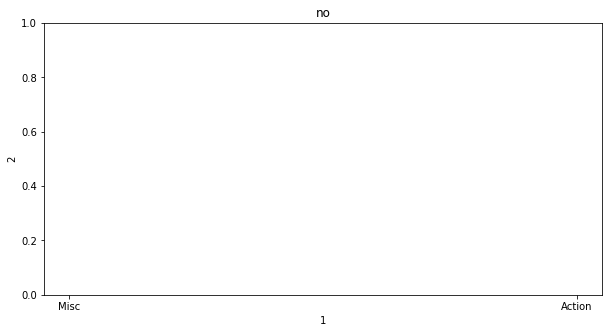

In [58]:
%matplotlib inline
def plot_line(x, y, column, title):
    plt.figure(figsize=(10, 5), clear=True)
    plt.title(title)
    plt.xlabel(column[0])
    plt.ylabel(column[1])
    plt.bar(x, y)
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
gu = list(df['Genre'].value_counts().index)
guv = df['Genre'].value_counts().to_numpy()
x = []
y = []
for i in np.argsort(np.char.str_len(gu)):
    x.append(gu[i])
    y.append(guv[i])
plot_line(x,y,['1', '2'], 'no')

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
list(df.columns).index('Name')

In [ ]:
df.where()